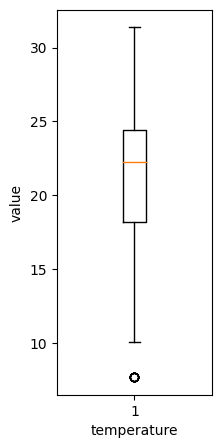

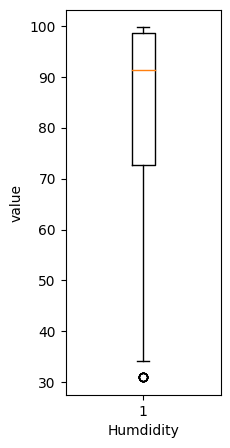

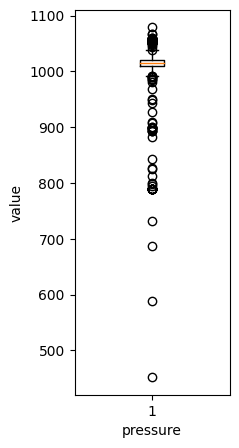

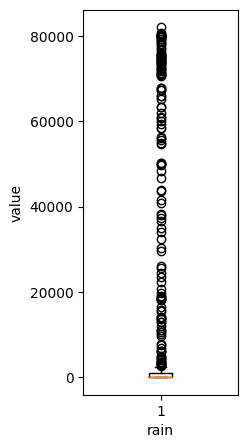

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('landslide_data_original.csv')

fig1 = plt.figure(figsize =(2, 5))
plt.xlabel('temperature')
plt.ylabel('value')
plt.boxplot(df["temperature"])

fig2 = plt.figure(figsize =(2, 5))
plt.xlabel('Humdidity')
plt.ylabel('value')
plt.boxplot(df["humidity"])

fig3 = plt.figure(figsize =(2, 5))
plt.xlabel('pressure')
plt.ylabel('value')
plt.boxplot(df["pressure"])

fig4 = plt.figure(figsize =(2, 5))
plt.xlabel('rain')
plt.ylabel('value')
plt.boxplot(df["rain"])

plt.show()

In [51]:
selected_columns=df.iloc[:,2:6]
print(selected_columns)

Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)

IR = Q3-Q1
lower_bound=Q1-1.5*IR
upper_bound=Q3+1.5*IR

for column in selected_columns.columns:
    outliers=(selected_columns[column] < lower_bound[column]) | (selected_columns[column] > upper_bound[column])
    # print(selected_columns[column][outliers])
    print(f"Outliers in {column}-{outliers.sum()}")

     temperature  humidity     pressure      rain
0       25.46875  82.18750  1036.346875      6.75
1       26.19298  83.14912  1037.604386   1761.75
2       25.17021  85.34043  1037.889362    652.50
3       24.29851  87.68657  1036.857463    963.00
4       24.06923  87.64615  1027.830769    254.25
..           ...       ...          ...       ...
940     16.65926  58.69630  1026.797407  73577.25
941     15.52482  63.16312  1027.495248  65301.75
942     15.81560  59.21277  1029.318511  73534.50
943     16.58571  54.63571  1026.776357  72283.50
944     17.90000  49.41000  1026.771200  71799.75

[945 rows x 4 columns]
Outliers in temperature-10
Outliers in humidity-8
Outliers in pressure-132
Outliers in rain-184


Outliers in temperature-0
Outliers in humidity-7
Outliers in pressure-0
Outliers in rain-0


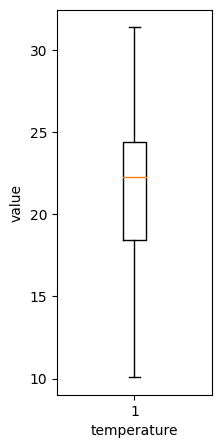

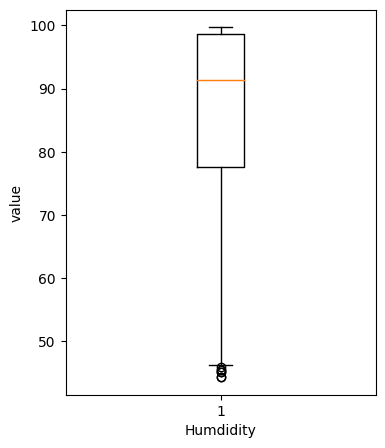

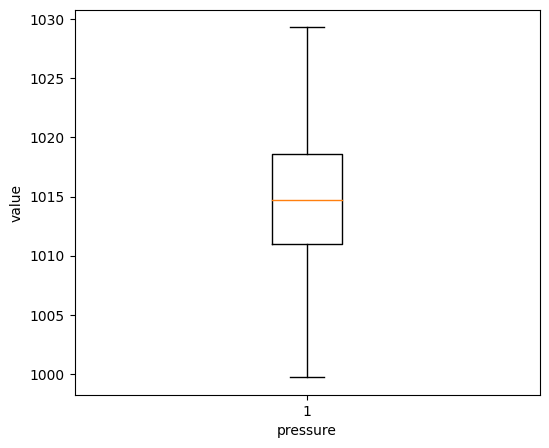

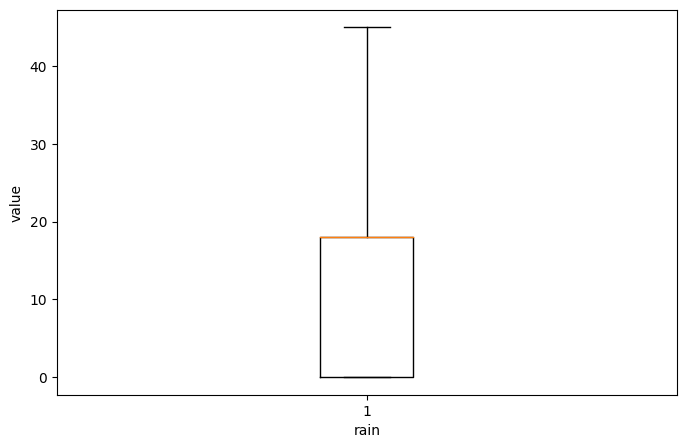

In [56]:
for column in selected_columns.columns:
    outliers=(selected_columns[column] < lower_bound[column]) | (selected_columns[column] > upper_bound[column])
    selected_columns[column][outliers]=selected_columns[column].median()

selected_columns.to_csv('landslide_data_corrected.csv')
new1=pd.read_csv('landslide_data_corrected.csv')
new=new1.iloc[:,1:5]
Q1 = new.quantile(0.25)
Q3 = new.quantile(0.75)

IR = Q3-Q1
lower_bound=Q1-1.5*IR
upper_bound=Q3+1.5*IR

for column in new.columns:
    outliers1=(new[column] < lower_bound[column]) | (new[column] > upper_bound[column])
    # print(selected_columns[column][outliers])
    print(f"Outliers in {column}-{outliers1.sum()}")

fig1 = plt.figure(figsize =(2, 5))
plt.xlabel('temperature')
plt.ylabel('value')
plt.boxplot(new["temperature"])

fig2 = plt.figure(figsize =(4, 5))
plt.xlabel('Humdidity')
plt.ylabel('value')
plt.boxplot(new["humidity"])

fig3 = plt.figure(figsize =(6, 5))
plt.xlabel('pressure')
plt.ylabel('value')
plt.boxplot(new["pressure"])

fig4 = plt.figure(figsize =(8, 5))
plt.xlabel('rain')
plt.ylabel('value')
plt.boxplot(new["rain"])

plt.show()

In [63]:
pearson1 = new.corrwith(new["temperature"], method="pearson")
spearman1 = new.corrwith(new["temperature"], method="spearman")

print("Pearson correlation with temperature")
print(pearson1)

print("Spearman correlation with temperature")
print(spearman1)
print("\n\n")




pearson2 = new.corrwith(new["humidity"], method="pearson")
spearman2 = new.corrwith(new["humidity"], method="spearman")

print("Pearson correlation with humidity")
print(pearson2)

print("Spearman correlation with humidity")
print(spearman2)
print("\n\n")



pearson3 = new.corrwith(new["pressure"], method="pearson")
spearman3 = new.corrwith(new["pressure"], method="spearman")

print("Pearson correlation with pressure")
print(pearson3)

print("Spearman correlation with pressure")
print(spearman3)
print("\n\n")


pearson4 = new.corrwith(new["rain"], method="pearson")
spearman4 = new.corrwith(new["rain"], method="spearman")

print("Pearson correlation with rain")
print(pearson4)

print("Spearman correlation with rain")
print(spearman4)
print("\n\n")

Pearson correlation with temperature
temperature    1.000000
humidity       0.231363
pressure      -0.520391
rain           0.215660
dtype: float64
Spearman correlation with temperature
temperature    1.000000
humidity       0.188142
pressure      -0.558867
rain           0.198654
dtype: float64



Pearson correlation with humidity
temperature    0.231363
humidity       1.000000
pressure      -0.462104
rain           0.075608
dtype: float64
Spearman correlation with humidity
temperature    0.188142
humidity       1.000000
pressure      -0.450045
rain           0.132134
dtype: float64



Pearson correlation with pressure
temperature   -0.520391
humidity      -0.462104
pressure       1.000000
rain          -0.064956
dtype: float64
Spearman correlation with pressure
temperature   -0.558867
humidity      -0.450045
pressure       1.000000
rain          -0.090346
dtype: float64



Pearson correlation with rain
temperature    0.215660
humidity       0.075608
pressure      -0.064956
rain      

In [79]:
pearson_corr = new.corr(method="pearson")
spearman_corr = new.corr(method="spearman")


print("Pearson Correlation")
print(pearson_corr)
print("\nSpearman Correlation")
print(spearman_corr)

Pearson Correlation
             temperature  humidity  pressure      rain
temperature     1.000000  0.231363 -0.520391  0.215660
humidity        0.231363  1.000000 -0.462104  0.075608
pressure       -0.520391 -0.462104  1.000000 -0.064956
rain            0.215660  0.075608 -0.064956  1.000000

Spearman Correlation
             temperature  humidity  pressure      rain
temperature     1.000000  0.188142 -0.558867  0.198654
humidity        0.188142  1.000000 -0.450045  0.132134
pressure       -0.558867 -0.450045  1.000000 -0.090346
rain            0.198654  0.132134 -0.090346  1.000000


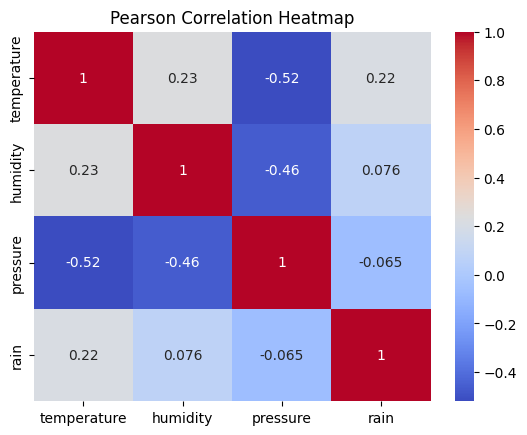

In [80]:
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

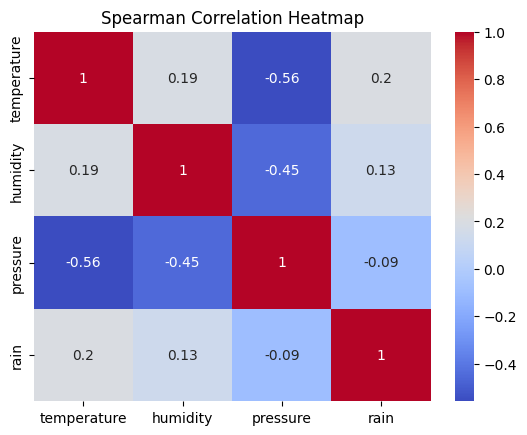

In [81]:
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [112]:
pearson_corr_copy = pearson_corr.copy()
for column in pearson_corr_copy.columns:
    for i in range(0,4):
        a = pearson_corr_copy[column][i]
        if (a == 1) | (a == -1):
            pearson_corr_copy[column][i] = "Perfect Correlation"
        if (a < 1 and a > 0.5) or (a < -0.5 and a > -1):
            pearson_corr_copy[column][i] = "Very Strong correlation"
        if (a <= 0.5 and a > 0.3) or (a < -0.3 and a >= -0.5):
            pearson_corr_copy[column][i] = "Strong correlation"
        if (a>0.1 and a<=0.3) or (a < -0.1 and a >= -0.3):
            pearson_corr_copy[column][i] = "Moderate correlation"
        if (a <= 0.1 and a > 0) or (a < 0 and a >= -0.1):
            pearson_corr_copy[column][i] = "Weak correlation"
        if (a == 0):
            pearson_corr_copy[column][i] = "No correlation"
print(pearson_corr_copy)

                         temperature              humidity  \
temperature      Perfect Correlation  Moderate correlation   
humidity        Moderate correlation   Perfect Correlation   
pressure     Very Strong correlation    Strong correlation   
rain            Moderate correlation      Weak correlation   

                            pressure                  rain  
temperature  Very Strong correlation  Moderate correlation  
humidity          Strong correlation      Weak correlation  
pressure         Perfect Correlation      Weak correlation  
rain                Weak correlation   Perfect Correlation  


/tmp/ipykernel_3092/3634871771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearson_corr_copy[column][i] = "Moderate correlation"
/tmp/ipykernel_3092/3634871771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearson_corr_copy[column][i] = "Very Strong correlation"
/tmp/ipykernel_3092/3634871771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearson_corr_copy[column][i] = "Moderate correlation"


In [114]:
spearman_corr_copy = spearman_corr.copy()
for column in spearman_corr_copy.columns:
    for i in range(0,4):
        a = spearman_corr_copy[column][i]
        if (a == 1) | (a == -1):
            spearman_corr_copy[column][i] = "Perfect Correlation"
        if (a < 1 and a > 0.5) or (a < -0.5 and a > -1):
            spearman_corr_copy[column][i] = "Very Strong correlation"
        if (a <= 0.5 and a > 0.3) or (a < -0.3 and a >= -0.5):
            spearman_corr_copy[column][i] = "Strong correlation"
        if (a>0.1 and a<=0.3) or (a < -0.1 and a >= -0.3):
            spearman_corr_copy[column][i] = "Moderate correlation"
        if (a <= 0.1 and a > 0) or (a < 0 and a >= -0.1):
            spearman_corr_copy[column][i] = "Weak correlation"
        if (a == 0):
            spearman_corr_copy[column][i] = "No correlation"
print(spearman_corr_copy)

                         temperature              humidity  \
temperature      Perfect Correlation  Moderate correlation   
humidity        Moderate correlation   Perfect Correlation   
pressure     Very Strong correlation    Strong correlation   
rain            Moderate correlation  Moderate correlation   

                            pressure                  rain  
temperature  Very Strong correlation  Moderate correlation  
humidity          Strong correlation  Moderate correlation  
pressure         Perfect Correlation      Weak correlation  
rain                Weak correlation   Perfect Correlation  


/tmp/ipykernel_3092/3031557327.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spearman_corr_copy[column][i] = "Moderate correlation"
/tmp/ipykernel_3092/3031557327.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spearman_corr_copy[column][i] = "Very Strong correlation"
/tmp/ipykernel_3092/3031557327.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spearman_corr_copy[column][i] = "Moderate correlation"


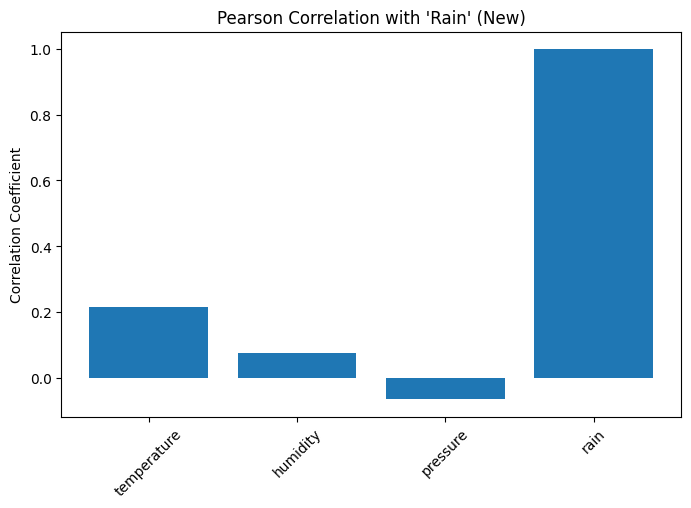

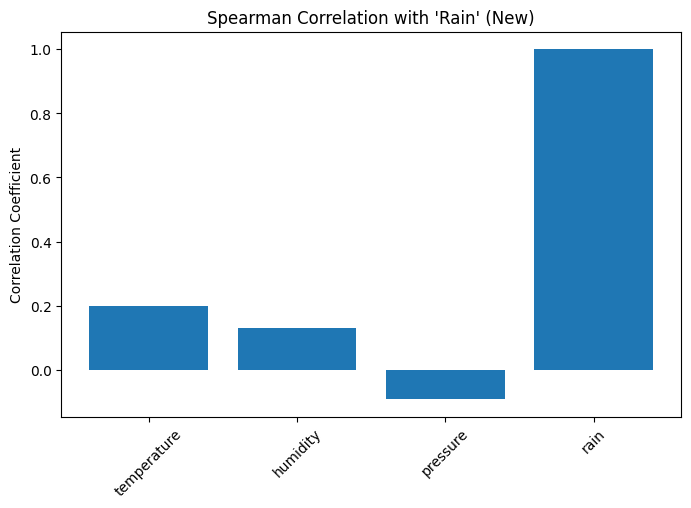

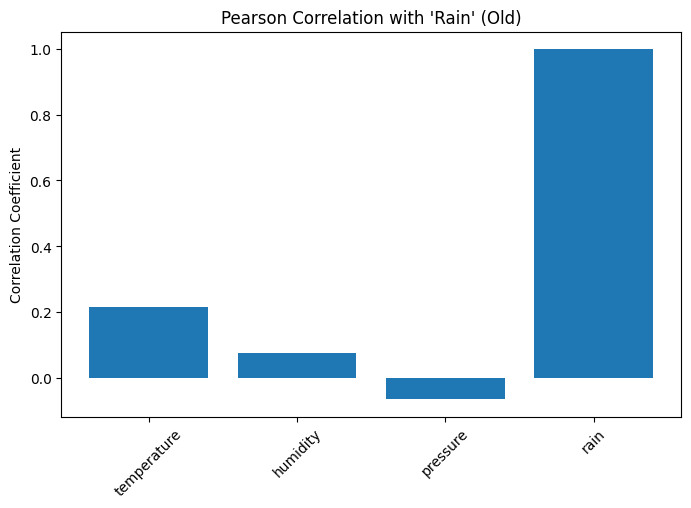

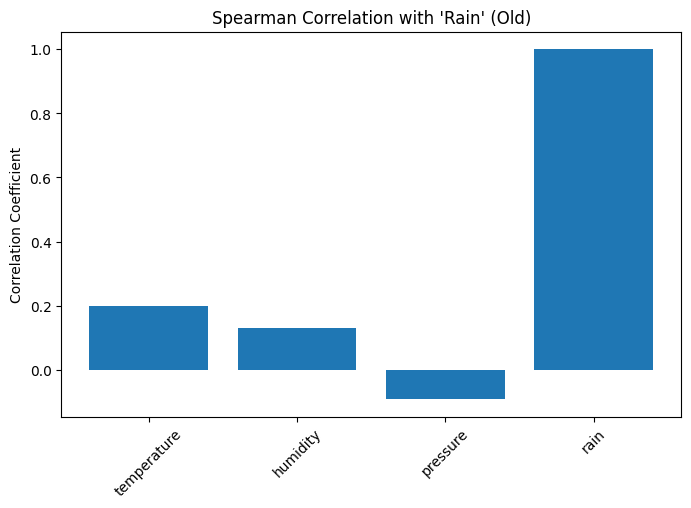

In [124]:
pearson_corr1 = selected_columns.corrwith(selected_columns["rain"], method="pearson")
spearman_corr1 = selected_columns.corrwith(selected_columns["rain"], method="spearman")

# print(pearson_corr.)
pearson_corr2 = new.corrwith(new["rain"], method="pearson")
spearman_corr2 = new.corrwith(new["rain"], method="spearman")

plt.figure(figsize=(8, 5))
plt.bar(pearson_corr2.index, pearson_corr2.values)
plt.title("Pearson Correlation with 'Rain' (New)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(spearman_corr2.index, spearman_corr2.values)
plt.title("Spearman Correlation with 'Rain' (New)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(pearson_corr1.index, pearson_corr1.values)
plt.title("Pearson Correlation with 'Rain' (Old)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(spearman_corr1.index, spearman_corr1.values)
plt.title("Spearman Correlation with 'Rain' (Old)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

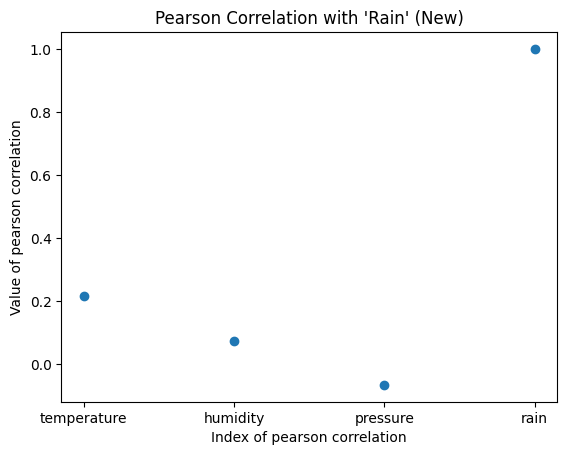

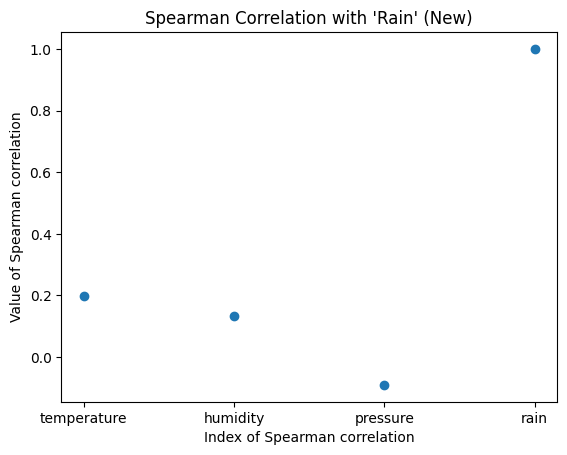

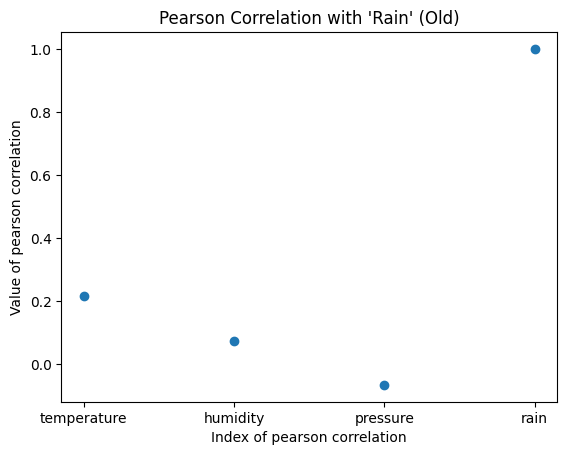

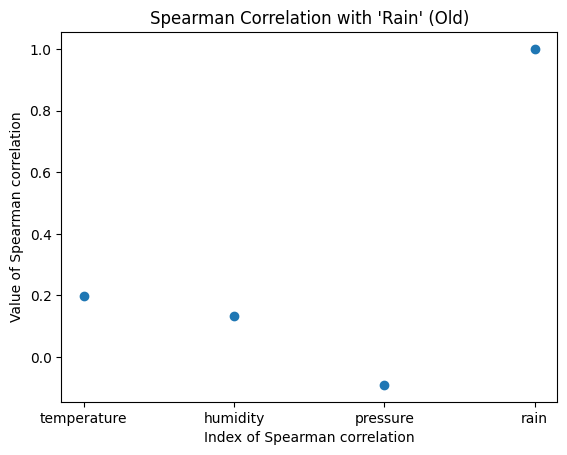

In [131]:
plt.title("Pearson Correlation with 'Rain' (New)")
plt.scatter(pearson_corr2.index,pearson_corr2.values)
plt.xlabel("Index of pearson correlation")
plt.ylabel("Value of pearson correlation")
plt.show()

plt.title("Spearman Correlation with 'Rain' (New)")
plt.scatter(spearman_corr2.index,spearman_corr2.values)
plt.xlabel("Index of Spearman correlation")
plt.ylabel("Value of Spearman correlation")
plt.show()


plt.title("Pearson Correlation with 'Rain' (Old)")
plt.scatter(pearson_corr1.index,pearson_corr1.values)
plt.xlabel("Index of pearson correlation")
plt.ylabel("Value of pearson correlation")
plt.show()


plt.title("Spearman Correlation with 'Rain' (Old)")
plt.scatter(spearman_corr1.index,spearman_corr1.values)
plt.xlabel("Index of Spearman correlation")
plt.ylabel("Value of Spearman correlation")
plt.show()

In [140]:
print(f"Minimum of new data:\n{new.min()}\n\n")
print(f"Maximum of new data:\n{new.max()}\n\n")

# print(f"Range: {new.min()} - {new.max()}\n\n")

Minimum of new data:
temperature     10.085110
humidity        44.312060
pressure       999.718333
rain             0.000000
dtype: float64


Maximum of new data:
temperature      31.375000
humidity         99.720000
pressure       1029.318511
rain             45.000000
dtype: float64




In [150]:
new2 = new.copy()
for column in new2.columns:
    min_temp = new2[column].min()
    max_temp = new2[column].max()
    for i in range(0,945):
        new2[column][i] = (((new2[column][i] - min_temp)/(max_temp - min_temp))*(1-0) ) + 0

print("Min max noramlization: 0-1")
print(new2)



pearson_corr3 = new.corr(method="pearson")
spearman_corr3 = new.corr(method="spearman")

print("\n\n\nPearson Correlation (without normalization)")
print(pearson_corr3)
print("\n\nSpearman Correlation (without normalization)")
print(spearman_corr3)

pearson_corr4 = new2.corr(method="pearson")
spearman_corr4 = new2.corr(method="spearman")


print("\n\n\nPearson Correlation (with normalization)")
print(pearson_corr4)
print("\n\nSpearman Correlation  (without normalization)")
print(spearman_corr4)

Min max noramlization: 0-1
     temperature  humidity  pressure  rain
0       0.722580  0.683574  0.505385  0.15
1       0.756597  0.700930  0.505385  0.40
2       0.708557  0.740478  0.505385  0.40
3       0.667613  0.782821  0.505385  0.40
4       0.656843  0.782092  0.949739  0.40
..           ...       ...       ...   ...
940     0.308792  0.259606  0.914828  0.40
941     0.255507  0.340223  0.938404  0.40
942     0.269165  0.268927  1.000000  0.40
943     0.305337  0.186321  0.914117  0.40
944     0.367070  0.092007  0.913943  0.40

[945 rows x 4 columns]



Pearson Correlation (without normalization)
             temperature  humidity  pressure      rain
temperature     1.000000  0.231363 -0.520391  0.215660
humidity        0.231363  1.000000 -0.462104  0.075608
pressure       -0.520391 -0.462104  1.000000 -0.064956
rain            0.215660  0.075608 -0.064956  1.000000


Spearman Correlation (without normalization)
             temperature  humidity  pressure      rain
temperatu

In [151]:
new3 = new.copy()
for column in new3.columns:
    min_temp = new3[column].min()
    max_temp = new3[column].max()
    for i in range(0,945):
        new3[column][i] = (((new3[column][i] - min_temp)/(max_temp - min_temp))*(20-0) ) + 0

print("Min max noramlization: 0-20")
print(new3)


Min max noramlization: 0-20
     temperature   humidity   pressure  rain
0      14.451592  13.671485  10.107709   3.0
1      15.131943  14.018590  10.107709   8.0
2      14.171139  14.809563  10.107709   8.0
3      13.352253  15.656424  10.107709   8.0
4      13.136864  15.641834  18.994775   8.0
..           ...        ...        ...   ...
940     6.175842   5.192122  18.296562   8.0
941     5.110134   6.804462  18.768073   8.0
942     5.383297   5.378547  20.000000   8.0
943     6.106748   3.726415  18.282339   8.0
944     7.341409   1.840148  18.278854   8.0

[945 rows x 4 columns]


In [159]:
new4 = new.copy()
for column in new4.columns:
    mean_temp = new4[column].mean()
    std_temp = new4[column].std()
    for i in range(0,945):
        new4[column][i] = (new4[column][i] - mean_temp)/(std_temp)
print("Standardize: \n")
print(new4)

print("New Mean")
print(new4.mean())

print("New standard deviation")
print(new4.std())

print("\n\n\nPearson Correlation (without standardization)")
print(pearson_corr3)
print("\n\nSpearman Correlation (without standardization)")
print(spearman_corr3)

pearson_corr5 = new4.corr(method="pearson")
spearman_corr5 = new4.corr(method="spearman")


print("\n\n\nPearson Correlation (with standardization)")
print(pearson_corr5)
print("\n\nSpearman Correlation  (with standardization)")
print(spearman_corr5)

Standardize: 

     temperature  humidity  pressure      rain
0       0.993703 -0.259070 -0.039359 -0.371059
1       1.169259 -0.194383 -0.039359  0.809227
2       0.921335 -0.046975 -0.039359  0.809227
3       0.710032  0.110848 -0.039359  0.809227
4       0.654454  0.108129  2.270340  0.809227
..           ...       ...       ...       ...
940    -1.141753 -1.839302  2.088878  0.809227
941    -1.416746 -1.538823  2.211421  0.809227
942    -1.346259 -1.804559  2.531592  0.809227
943    -1.159582 -2.112454  2.085182  0.809227
944    -0.840992 -2.463983  2.084276  0.809227

[945 rows x 4 columns]
New Mean
temperature    1.203035e-16
humidity      -6.635492e-16
pressure      -8.391171e-15
rain          -9.022765e-17
dtype: float64
New standard deviation
temperature    1.0
humidity       1.0
pressure       1.0
rain           1.0
dtype: float64



Pearson Correlation (without standardization)
             temperature  humidity  pressure      rain
temperature     1.000000  0.231363 -0.52039

In [165]:
col = new.columns
data_minmax = new.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_minmax[col] = scaler_minmax.fit_transform(new[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
print(data_minmax)

Min-Max Normalized Data (Range 0-1) using Scikit-learn:
     temperature  humidity  pressure  rain
0       0.722580  0.683574  0.505385  0.15
1       0.756597  0.700930  0.505385  0.40
2       0.708557  0.740478  0.505385  0.40
3       0.667613  0.782821  0.505385  0.40
4       0.656843  0.782092  0.949739  0.40
..           ...       ...       ...   ...
940     0.308792  0.259606  0.914828  0.40
941     0.255507  0.340223  0.938404  0.40
942     0.269165  0.268927  1.000000  0.40
943     0.305337  0.186321  0.914117  0.40
944     0.367070  0.092007  0.913943  0.40

[945 rows x 4 columns]


In [170]:
col = new.columns
data_minmax2 = new.copy()
scaler_minmax2 = MinMaxScaler(feature_range=(0, 20))
data_minmax2[col] = scaler_minmax2.fit_transform(new[col])
print("Min-Max Normalized Data (Range 0-20) using Scikit-learn:")
print(data_minmax2)

Min-Max Normalized Data (Range 0-20) using Scikit-learn:
     temperature   humidity   pressure  rain
0      14.451592  13.671485  10.107709   3.0
1      15.131943  14.018590  10.107709   8.0
2      14.171139  14.809563  10.107709   8.0
3      13.352253  15.656424  10.107709   8.0
4      13.136864  15.641834  18.994775   8.0
..           ...        ...        ...   ...
940     6.175842   5.192122  18.296562   8.0
941     5.110134   6.804462  18.768073   8.0
942     5.383297   5.378547  20.000000   8.0
943     6.106748   3.726415  18.282339   8.0
944     7.341409   1.840148  18.278854   8.0

[945 rows x 4 columns]


In [172]:
data_standardized = new.copy()
scaler_standard = StandardScaler()
data_standardized[col] = scaler_standard.fit_transform(new[col])
print("Standardized Data using Scikit-learn:")
print(data_standardized)

Standardized Data using Scikit-learn:
     temperature  humidity  pressure      rain
0       0.994229 -0.259207 -0.039379 -0.371256
1       1.169878 -0.194485 -0.039379  0.809655
2       0.921823 -0.047000 -0.039379  0.809655
3       0.710408  0.110906 -0.039379  0.809655
4       0.654800  0.108186  2.271542  0.809655
..           ...       ...       ...       ...
940    -1.142357 -1.840276  2.089984  0.809655
941    -1.417496 -1.539638  2.212592  0.809655
942    -1.346972 -1.805515  2.532932  0.809655
943    -1.160196 -2.113573  2.086286  0.809655
944    -0.841438 -2.465287  2.085380  0.809655

[945 rows x 4 columns]
